<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#поиск-дисбаланса" data-toc-modified-id="поиск-дисбаланса-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>поиск дисбаланса</a></span><ul class="toc-item"><li><span><a href="#Разделим-данные" data-toc-modified-id="Разделим-данные-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Разделим данные</a></span></li></ul></li><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Масштабирование</a></span></li><li><span><a href="#Нормальное-закодирование-категориальных-признаков." data-toc-modified-id="Нормальное-закодирование-категориальных-признаков.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Нормальное закодирование категориальных признаков.</a></span></li><li><span><a href="#приступаем-к-обучению" data-toc-modified-id="приступаем-к-обучению-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>приступаем к обучению</a></span><ul class="toc-item"><li><span><a href="#логистическая-регрессия" data-toc-modified-id="логистическая-регрессия-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>логистическая регрессия</a></span></li><li><span><a href="#дерево-решений" data-toc-modified-id="дерево-решений-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>дерево решений</a></span></li><li><span><a href="#случайный-лес" data-toc-modified-id="случайный-лес-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**

- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**

- `Exited` — факт ухода клиента

Как будет проходить работа. Надо подготовить данные, исследовать все аномалии пропуски и так далее, проверить, чтобы все типы данных были заданы правильно и не было никаких лишних или неправильных вещей в данных.

Потом провести поиск дисбаланса и без попытки борьбы с ним попробовать обучить модели и найти лучшую. 

Далее надо разобраться с дисбалансом даннных, для этого сущевтсвует две известных нам техники, выберем одну из них и применем ее для борьбы с дисбалансом. 

После этого, проведем обучение моделей, выберем лучшую и попытаемся довести метрику f1-меру довести до значения не меньшего 0.59.

Протестируем нашу моедль на тестовой выборке.


Итого, работа будет состоять из 6 этапов:

- подготовка данных
- обучению с дисбалансом
- борьба с дисбалансом
- обучение без дисбаланса
- тестирование
- выводы

Импортируем нужные библиотеки

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

## Подготовка данных

Загрузим датасет и посмотри на его первые 5 строк

In [31]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Узнаем размеры датасета

In [32]:
data.shape

(10000, 14)

выведем общую информацию о датасете

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Выведем основную информацию о количественных признаках датасета

In [34]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,9091.0,NaN,NaN,NaN,4.99769,2.894723,0.0,2.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


Выведем количество пропусков по каждому признаку

In [36]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Так как в таске сказано, что наблюдается небольшой отток клиентов, то скорее всего в данных наблюдается дисбаланс данных, поэтому проверим насколько важны строки с пропусками в признаке Tenure

In [37]:
data.loc[(data['Tenure'].isna())&(data['Exited']==1)]['Exited'].count()/909

0.20132013201320131

In [38]:
data.loc[(data['Exited']==1)]['Exited'].count()/10000

0.2037

Видно, что процентное содержание ушедших такое же как и во всей выборке, поэтмоу мы можем спокойно удалить эти строки.

In [39]:
data = data.dropna()
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [40]:
data.shape

(9091, 14)

Посмотрим на количество уникальных фамилий

In [43]:
len(data['Surname'].unique())

2787

Проверим на явные дубликаты

In [44]:
data.duplicated().sum()

0

Теперь котегориальный признаки нужно закодировать, для этого применим ОНЕ

In [45]:
data_with_surname = data
data=data.drop(['Surname','RowNumber', 'CustomerId'],axis=1)

попытаемся не влезть в дамми ловушку

In [67]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Вывод: данных наблюдается хорошее количество. От пропусков мы избавились, на данные это почти не должно было повлиять. Явные дубликаты не обнаружены. Закодировали данные, к сожалению пришлось потерять фамилии, но думаю между ними никакой связи с оттоком не должно быть
Приступим к работе!

## Исследование задачи

### поиск дисбаланса

Требуется обучить модели без учета дисбаланса данных, попробуем его для начала найти

In [68]:
data.loc[(data['Exited']==1)]['Exited'].count()/data.shape[0]

0.2039379606203938

Ушедшие клиенты составляют примерно 18.5% от общего количества клиентов. Это с уверенностью можно назвать дисбалансом классов. Но попробуй обучить несколько разных моделей без учета этого дисбаланса

#### Разделим данные

In [69]:
target = data['Exited']
features = data.drop('Exited', axis=1)

In [70]:
print(target.head())
features.columns

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

Разделим данные на обучающие, валидационные, тестовые в отношении 3:1:1

In [71]:
features_train, features_buf, target_train, target_buf = train_test_split(
                    features, target, test_size=0.4, random_state=12345
)
features_valid, features_test, target_valid, target_test = train_test_split(
                    features_buf, target_buf, test_size=0.5, random_state=12345)

### Масштабирование

In [72]:
pd.options.mode.chained_assignment = None
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [73]:
scaler = StandardScaler()

numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Нормальное закодирование категориальных признаков.
Здесь нужно сделать как раз закодирование ОНЕ с помощью ОneHotEncoder встроенного в sklearn 

In [74]:
#from sklearn.preprocessing import OneHotEncoder

In [75]:
#categ = ['Geography', 'Gender']

In [76]:
#enc = OneHotEncoder(drop='first',handle_unknown='ignore')
#enc.fit(features_train[categ])

### приступаем к обучению

#### логистическая регрессия

In [77]:
model_1 = LogisticRegression(random_state=12345)

In [78]:
model_1.fit(features_train, target_train)

predictions_valid_1 = model_1.predict(features_valid)

In [80]:
print('f1',f1_score(predictions_valid_1, target_valid))
print('accuracy',model_1.score(features_valid, target_valid))

f1 0.3033932135728543
accuracy 0.8080308030803081


F1 мера равна 0.3, это значит, что она совсем нам не подходит, так как она плохо описывает нашу выборку.

In [81]:
confusion_matrix(target_valid, predictions_valid_1)

array([[1393,   48],
       [ 301,   76]])

In [82]:
model_2 = LogisticRegression(solver='liblinear',random_state=12345)

In [83]:
model_2.fit(features_train, target_train)

predictions_valid_2 = model_2.predict(features_valid)

In [84]:
print(f1_score(predictions_valid_2, target_valid))
print(model_2.score(features_valid, target_valid))

0.3033932135728543
0.8080308030803081


Понятно, что логистическая регрессия нам не подходит. Перейдем к дереву

#### дерево решений

Попробуем дерево решений

In [85]:
%%time

best_depth = 0
max_f1 = 0
for depth in range(1, 16):

    model_3 = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_3.fit(features_train, target_train)

    predictions_valid_3 = model_3.predict(features_valid)
    f1 = f1_score(predictions_valid_3, target_valid)
    if f1 > max_f1:
        max_f1 = f1
        best_depth = depth

print('best_depth =', best_depth)
print('f1_score =', max_f1)

best_depth = 7
f1_score = 0.5764331210191083
CPU times: user 287 ms, sys: 0 ns, total: 287 ms
Wall time: 285 ms


уже гораздо лучше, но еще не дотягивает до необходимого нам значения f1-меры.

#### случайный лес

Подберем оптимальные значения гиперпараметров случайного леса.

In [86]:
# %%time

# best_depth = 0
# best_f1 = 0
# for depth in range(1,16):
#     model_4 = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345)
    
#     model_4.fit(features_train, target_train)
    
#     predictions_valid_4 = model_4.predict(features_valid)
#     f1 = f1_score(predictions_valid_4, target_valid)

#     if f1 > best_f1:
#         best_depth = depth
#         best_f1 = f1
        
# print('Best F1: ',best_f1)
# print('best_depth', best_depth)


Best F1:  0.5845648604269295
best_depth 15
CPU times: user 1.55 s, sys: 0 ns, total: 1.55 s
Wall time: 1.55 s


In [87]:
# %%time

# best_est = 0
# best_f1 = 0
# for est in range(10, 101, 5):
#     model_5 = RandomForestClassifier(n_estimators=est,  max_depth=best_depth, random_state=12345)
    
#     model_5.fit(features_train, target_train)
    
#     predictions_valid_5 = model_5.predict(features_valid)
#     f1 = f1_score(predictions_valid_5, target_valid)

#     if f1 > best_f1:
#         best_est = est
#         best_f1 = f1
    
    
# print('Best F1: ',best_f1)
# print('best_est', best_est)

Best F1:  0.5874587458745875
best_est 55
CPU times: user 6.7 s, sys: 0 ns, total: 6.7 s
Wall time: 6.71 s


In [90]:
%%time

best_est = 0
best_f1 = 0
best_depth = 0
for est in range(10, 101, 10):
    for depth in range(1, 14, 2):
        model_5 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        
        model_5.fit(features_train, target_train)
    
        predictions_valid_5 = model_5.predict(features_valid)
        f1 = f1_score(predictions_valid_5, target_valid)

        if f1 > best_f1:
            best_est = est
            best_depth = depth
            best_f1 = f1
    
    
print('Best F1: ',best_f1)
print('best_est', best_est)
print('best_depth', best_depth)

Best F1:  0.5796610169491526
best_est 40
best_depth 11
CPU times: user 16 s, sys: 69.3 ms, total: 16.1 s
Wall time: 16.1 s


In [92]:
model_5 = RandomForestClassifier(n_estimators=best_est, max_depth=best_depth, random_state=12345)

model_5.fit(features_train, target_train)

# predicted_valid = model_5.predict(features_valid)

print('Accuracy',model_5.score(features_valid, target_valid))

Accuracy 0.8635863586358636


Выводы, дисбаланс вносит большие проблемы с предсказаниеями, лучшее значение у f1 меры на валидационной выборке получилось у модели дерева, но оно все равно достаточно низкое, поэтотму будем пытаться избавляться от дисбаланса.

## Борьба с дисбалансом

Первым делом, определимся какой техникой мы будем пользоваться, есть две техники, upsampling (мы дублируем класс, который встречается реже) и downsampling ( мы откидываем часть выборки часто встречающегося класса). Так как у нас достаточно много элементов положительного класса, то мы воспользуемся техникой downsampling, но на всякий случай можно обе проверить.

В прошлом пункте, мы проверяли три модели, но логистическая регрессия плохо себя показала, поэтому мы не будем ее рассматривать


In [93]:
def downsample(features, target, decrease):
    '''
    На вход подается две выборки, тренировчные прихнаки и тренировочные ответы, 
    а так же третим элементом подается на какую долю мы усеньшим нашу выборку
    '''
    
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_zeros_downsampled = features_zeros.sample(frac=decrease, random_state=12345)
    target_zeros_downsampled = target_zeros.sample(frac=decrease, random_state=12345)
    
    features_downsampled = pd.concat([features_zeros_downsampled]+[features_ones])
    target_downsampled = pd.concat([target_zeros_downsampled]+[target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [94]:
features_zeros = features[target==0]
features_ones = features[target==1]

print(features_zeros.shape)
print(features_ones.shape)

(7237, 11)
(1854, 11)


In [101]:
print(1900/7237)

0.26253972640596934


уменьшим отрицательный класс до 1900 элементов, для этого откинем 1- (1900/7237) =  0.737 от количестива элементов отрицательного класса

In [102]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.262)

In [106]:
# features_downsampled= pd.DataFrame(features_downsampled)
# target_downsampled = pd.DataFrame(target_downsampled)


In [108]:
features_zeros = features_downsampled[target_downsampled==0]
features_ones = features_downsampled[target_downsampled==1]

print(features_zeros.shape)
print(features_ones.shape)

(1134, 11)
(1126, 11)


дисбаланс убран,теперь можно приступить к обучению

In [111]:
# best_depth = 0
# best_f1 = 0
# for depth in range(1,16,1):
#     model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
#     model.fit(features_downsampled, target_downsampled)
    
#     predicted_valid = model.predict(features_valid)
#     f1 = f1_score(target_valid, predicted_valid)
#     if f1> best_f1:
#         best_f1= f1
#         best_depth = depth
        
# print('Best f1 score =', best_f1)
# print('Best depth =', best_depth)

In [113]:
%%time
best_est = 0
best_f1 = 0
best_depth = 0
for depth in range(1,16,2):
    for est in range(10,101,10):
        model = RandomForestClassifier(n_estimators=est,max_depth=depth, random_state=12345)
        model.fit(features_downsampled, target_downsampled)

        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1= f1
            best_est = est
            best_depth = depth

print('Best f1 score =', best_f1)
print('Best est =', best_est)
print('Best depth =', best_depth)

Best f1 score = 0.6054490413723511
Best est = 90
Best depth = 11
CPU times: user 12.6 s, sys: 91 ms, total: 12.7 s
Wall time: 12.7 s


успех, у нас получилось довести f1 меру до необходимого значения c гиперпараметрами: глубина максимальная 11, количество деревьев - 90 шт.

In [114]:
def upsample(features, target, repeat):
    ### увеливаем количество данных положительногог класса
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 5)


In [115]:
%%time
best_est = 0
best_f1 = 0
best_depth = 0
for depth in range(1,16,2):
    for est in range(10,101,10):
        model = RandomForestClassifier(n_estimators=est,max_depth=depth, random_state=12345)
        model.fit(features_upsampled, target_upsampled)

        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1= f1
            best_est = est
            best_depth = depth

print('Best f1 score =', best_f1)
print('Best est =', best_est)
print('Best depth =', best_depth)

Best f1 score = 0.6292993630573248
Best est = 90
Best depth = 13
CPU times: user 29.2 s, sys: 70.3 ms, total: 29.2 s
Wall time: 29.3 s


Результат просто фантастический, модель, которая обучилась на увеличенной выборке гораздо лучше себя показала на валидационной выборке.
Поэтому далее будем использовать эту выборку и эту модель с данными гиперпараметрами

## Тестирование модели

In [116]:
est = 90
depth = 13

model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
model.fit(features_upsampled, target_upsampled)

predicted_test = model.predict(features_test)

f1 = f1_score(target_test, predicted_test)

print('Значение f1 меры равно', f1)
print('Accuracy', accuracy_score(target_test, predicted_test))

Значение f1 меры равно 0.5944517833553501
Accuracy 0.8312259483232546


На тестовой выборке значения модели вполне хорошие, не совсем понятно на какой из выборок нужно иметь значение f1 меры не менее 0.59.

Модель достаточно хорошо обучилась, нужно проверить ее на адекватность.

In [118]:
predicted_const = pd.Series([1]*target_test.shape[0])

f1 = f1_score(target_test, predicted_const)

print('Значение f1 меры равно', f1)
print('Accuracy', accuracy_score(target_test, predicted_const))

Значение f1 меры равно 0.3235023041474654
Accuracy 0.19296316657504123


In [120]:
from sklearn.dummy import DummyClassifier

In [121]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)

0.3235023041474654

посторим ROC кривую

In [122]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

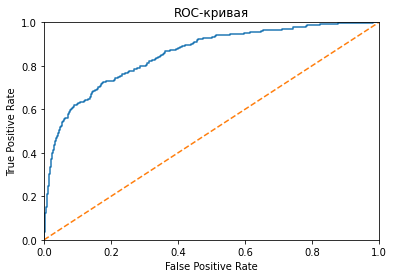

In [123]:
plt.plot(fpr,tpr)
# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim(0,1)
plt.ylim(0,1)


plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 

plt.title("ROC-кривая")

plt.show()

In [124]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)


print(auc_roc)

0.8540293594789508


## Вывод

Была проделана работа, по исследования базы данных банка, обучили много разных моделей, нашли наилучшую, теперь готовы искать клиентов, которые собираются уходить из банка. Наша модель, может определить, собирается ли уходить, это поможет банку сохранить старых клиентов, так как сохранить старых дешевле, а значит выгодней, чем переманить к себе новых. 

Мы проделали подготовку данных. Проверили на явные дубликаты, убрали пропуски, проверили типы данных и закодировали категориальные данные техникой ОНЕ. 

В работе были проделаны следующие шаги :
- подготовка данных
- исследование задания и поиск дисбаланса, обучение модели
- борьба с дисбалансом, повторное оббучение моделей.
- тестирование модели
- подведение итогово

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*